## SyriaTel Customer Churn

### i) Business Understanding

SyriaTel Telecommunications has been encountering losses, on further investigation they discovered it was partly due to over-investing in customers who did not stick around too long.The company has set out to identify any clues or patterns that indicate the possibility of a customer stopping business with them 'soon'.

### ii) Data Understanding

The dataset is obtained from kaggle and can be found in this link - https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data

### iii) Importing the data and required libraries

In [85]:
#loading required libraries
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer

In [30]:
#loading the data
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [31]:
df.shape

(3333, 21)

In [32]:
## Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [33]:
#checking data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [34]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [35]:
df.value_counts()

state  account length  area code  phone number  international plan  voice mail plan  number vmail messages  total day minutes  total day calls  total day charge  total eve minutes  total eve calls  total eve charge  total night minutes  total night calls  total night charge  total intl minutes  total intl calls  total intl charge  customer service calls  churn
WY     225             415        374-1213      no                  no               0                      182.7              142              31.06             246.5              63               20.95             218.0                103                9.81                8.8                 2                 2.38               1                       False    1
MD     121             510        369-5526      no                  no               0                      190.7              103              32.42             183.5              117              15.60             220.8                103                9.94         

The data set has 3333 rows and 21 columns.It does not also have missing values.
Ideally data cleaning would have come after the split of the train and test data sets to prevent data leakage,hence the above is just a check.

### iv) Splitting data into train and test data sets

In [36]:
#splitting of data set into train and test groups
y = df['churn']
X = df.drop(['churn'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

### v) Data Preprocessing

In [41]:
#checking number of columns and rows after the split to confirm working
X_train.shape

(2666, 20)

In [42]:
y_train.shape

(2666,)

#### 1) Data Encoding

Encoding done since some features were seen to be categorical values,one hot encoding undertaken as the objects are nominal. Machine learning models can only work with numerical values,hence the encoding.

In [43]:
# One-hot encode the training data and test data
ohe = OneHotEncoder(handle_unknown = 'ignore')
X_train_enc = ohe.fit_transform(X_train).toarray()
X_test_enc = ohe.transform(X_test).toarray()


#### 2) Feature selection

This is undertaken to identify features that have a higher correlation with the target variable and therefore optimize our results from the model. It also makes it easier during scaling as there are fewer features to be worked on.

In [44]:
# feature selection using filter method

selector = SelectKBest(score_func=f_regression,k=7)#7 features
X_train_sel = selector.fit_transform(X_train_enc,y_train)
print(selector.get_support())#true for the selected features

[False False False ... False False False]


In [47]:
## option two of feature selection using correlation
df.corr()['churn']

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

#### 3) Standardization/scaling

In [48]:
#standardize
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

## vi) Creating,training,predicting and evaluation - logistic regression model

The problem in question is to predict whether a customer will soon stop doing business with SyriaTel. It is therefore a binary classification problem, it can thus be solved by classification models/techniques. To begin we'll start with the simpler logistic regression model.

In [49]:
#model training
modellog = LogisticRegression(max_iter=1000)
modellog.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [50]:
#mm = modellog.feature_names_in_
#mm

In [51]:
#evaluate on testing data
trainlog_pred = modellog.predict(X_train_scaled)
print(classification_report(y_train,trainlog_pred))

              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2284
        True       0.61      0.17      0.27       382

    accuracy                           0.87      2666
   macro avg       0.74      0.58      0.60      2666
weighted avg       0.84      0.87      0.83      2666



In [52]:
#evaluate on testing data
testlog_pred = modellog.predict(X_test_scaled)
print(classification_report(y_test,testlog_pred))

              precision    recall  f1-score   support

       False       0.86      0.99      0.92       566
        True       0.63      0.12      0.20       101

    accuracy                           0.86       667
   macro avg       0.75      0.55      0.56       667
weighted avg       0.83      0.86      0.81       667



1 Generally from the above classification report, the recall,f1-score values are very low for the true variable in both the training and testing datasets.The accuracy however is within the same range for both the training and testing dataset. From all the metrics observed,the model does not seem to be under/overfitting as the values are within the same ranges for both the test and train data.
The low recall value on the true variable means the model was not able to identify a good number of the customers who actually left, hence the low f1-score too.

2 Choosing evaluation metric - Precision covers how accurate our model is in predicting whether a customer will drop off,while recall shows what proportion (true positives)the model picks of the customers who actually dropped. To achieve a balance of this, we settle on the f1-score as our evaluation metric.

3 For further evaluation the ROC curve is used below to show the rate of truly predicting customers who drop off.

In [53]:
#Scikit learn's built in roc_curve returns the fpr,tpr,and threshold for various decision boundaries given the case member probabilities
#first calculate the probability scores of each of the data points

y_score = modellog.fit(X_train_scaled,y_train).decision_function(X_test_scaled)

#compute ROC curve values
fpr,tpr,thresholds = roc_curve(y_test,y_score)

In [54]:
#calculate AUC

auc(fpr,tpr)

0.681891334009726

AUC: 0.681891334009726


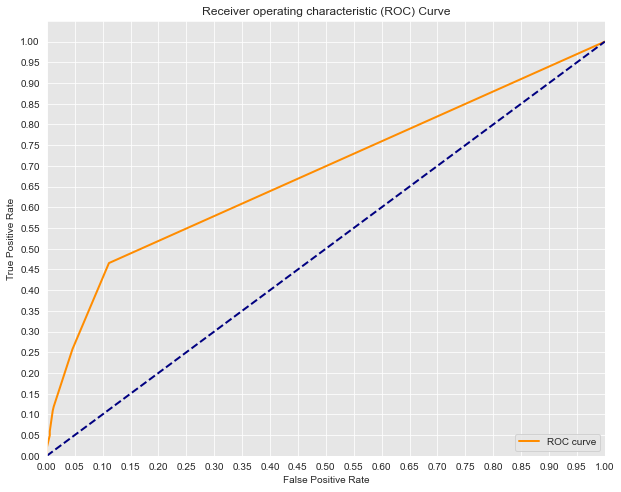

In [55]:
#plotting ROC curve
%matplotlib inline
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Although the AUC value is greater than 0.5,but still very close to 0.5, it can be better.The true positive Rate is also quite low, and it seems to increase with an increase in the false positive rate.

A possible mishap in the dataset could be data imbalance.

In [56]:
#checking distribution of dataset - X_train
X_train_scaleddf = pd.DataFrame(X_train_scaled)
X_train_scaleddf.value_counts()

0         1         2          3          4         5         6        
3.388248  0.000000  0.000000   0.000000   0.000000  0.000000  0.000000     2215
0.000000  3.388248  0.000000   0.000000   0.000000  0.000000  0.000000      234
3.388248  0.000000  0.000000   0.000000   4.694906  0.000000  0.000000      110
                                          0.000000  6.913304  0.000000       52
                                                    0.000000  11.311955      21
0.000000  3.388248  0.000000   0.000000   4.694906  0.000000  0.000000       15
3.388248  0.000000  13.835962  13.835962  0.000000  0.000000  0.000000        9
0.000000  3.388248  0.000000   0.000000   0.000000  6.913304  0.000000        5
                    13.835962  13.835962  0.000000  0.000000  0.000000        3
3.388248  0.000000  13.835962  13.835962  4.694906  0.000000  0.000000        2
dtype: int64

In [57]:
#checking distribution of dataset y_train
y_train_scaleddf = pd.DataFrame(y_train)
y_train_scaleddf.value_counts()

churn
False    2284
True      382
dtype: int64

#### 1) Applying SMOTE

In [58]:
# Applying SMOTE on the training data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaleddf, y_train_scaleddf) 
X_train_resampled.value_counts()

0         1         2          3          4         5         6        
3.388248  0.000000  0.000000   0.000000   0.000000  0.000000  0.000000     3112
0.000000  3.388248  0.000000   0.000000   0.000000  0.000000  0.000000      699
3.388248  0.000000  0.000000   0.000000   4.694906  0.000000  0.000000      356
                                          0.000000  6.913304  0.000000      189
                                                    0.000000  11.311955      81
0.000000  3.388248  0.000000   0.000000   4.694906  0.000000  0.000000       62
3.388248  0.000000  13.835962  13.835962  0.000000  0.000000  0.000000       23
0.000000  3.388248  0.000000   0.000000   0.000000  6.913304  0.000000       17
                    13.835962  13.835962  0.000000  0.000000  0.000000        6
3.388248  0.000000  13.835962  13.835962  4.694906  0.000000  0.000000        3
                                          0.047708  0.000000  0.000000        1
                                          0.7010

In [59]:
#resampled y_train distribution
y_train_resampled.value_counts()

churn
True     2284
False    2284
dtype: int64

The result of the SMOTE technique is as shown above, the number of samples are now equal.

In [60]:
#model training
modellog_S = LogisticRegression(max_iter=1000)
modellog_S.fit(X_train_resampled,y_train_resampled)

#evaluate on training data
trainlog_pred_S = modellog_S.predict(X_train_resampled)
print(classification_report(y_train_resampled,trainlog_pred_S))


              precision    recall  f1-score   support

       False       0.66      0.89      0.76      2284
        True       0.83      0.53      0.65      2284

    accuracy                           0.71      4568
   macro avg       0.74      0.71      0.70      4568
weighted avg       0.74      0.71      0.70      4568



c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
#evaluate on testing data
testlog_pred_S = modellog_S.predict(X_test_scaled)
print(classification_report(y_test,testlog_pred_S))

              precision    recall  f1-score   support

       False       0.90      0.89      0.90       566
        True       0.43      0.47      0.45       101

    accuracy                           0.82       667
   macro avg       0.67      0.68      0.67       667
weighted avg       0.83      0.82      0.83       667



The evaluation metrics  of the balanced dataset  on the true value have improved compared to the imbalanced dataset, they are higher.This is particularly true for the recall and f1-score.

However the training metrics are higher than the test metrics for the true value and lower for the false value.

In [62]:
y_score_S = modellog_S.fit(X_train_resampled,y_train_resampled).decision_function(X_test_scaled)

#compute ROC curve values
fpr,tpr,thresholds = roc_curve(y_test,y_score_S)

auc(fpr,tpr)


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.681891334009726

AUC: 0.681891334009726


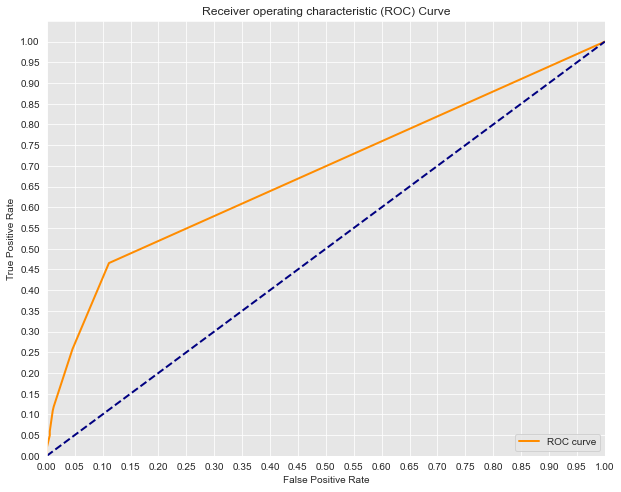

In [63]:
#plotting ROC curve
%matplotlib inline
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve after the SMOTE application is still the same.

#### 2) Regularization

To minimize the overfitting of the above model, we try using the ridge regularization. This is because it introduces a penalty but does not perform feature selection, as we do not want to loose any features.

In [64]:
#applying ridge regularization
ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge.fit(X_train_resampled, y_train_resampled)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42, solver='liblinear')

In [65]:
# Generate predictions for training and test sets
y_h_ridge_train = ridge.predict(X_train_resampled)
y_h_ridge_test = ridge.predict(X_test_scaled)

In [66]:
#evaluation metrics for the train data set
print(classification_report(y_train_resampled,y_h_ridge_train))

              precision    recall  f1-score   support

       False       0.66      0.89      0.76      2284
        True       0.83      0.53      0.65      2284

    accuracy                           0.71      4568
   macro avg       0.74      0.71      0.70      4568
weighted avg       0.74      0.71      0.70      4568



In [67]:
#evaluation metrics for the test data set
print(classification_report(y_test,y_h_ridge_test))

              precision    recall  f1-score   support

       False       0.90      0.89      0.90       566
        True       0.43      0.47      0.45       101

    accuracy                           0.82       667
   macro avg       0.67      0.68      0.67       667
weighted avg       0.83      0.82      0.83       667



From the ridge regularization done above the model still appears to be overfitting on the training data set.An alternative is using another model.

Using sag solver

In [68]:
#applying ridge regularization
ridge2 = LogisticRegression(penalty='l2', solver='sag', random_state=42)
ridge2.fit(X_train_resampled, y_train_resampled)

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='sag')

In [69]:
# Generate predictions for training and test sets
y_h_ridge_train1 = ridge2.predict(X_train_resampled)
y_h_ridge_test1 = ridge2.predict(X_test_scaled)

In [70]:
#evaluation metrics for the test data set
print(classification_report(y_test,y_h_ridge_test1))

              precision    recall  f1-score   support

       False       0.90      0.89      0.90       566
        True       0.43      0.47      0.45       101

    accuracy                           0.82       667
   macro avg       0.67      0.68      0.67       667
weighted avg       0.83      0.82      0.83       667



Using a different solver did not have an effect on the true values.

confusion matrix plot

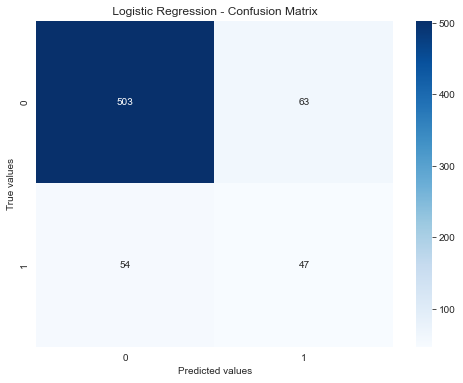

Confusion Matrix:
[[503  63]
 [ 54  47]]


In [89]:
con_mat = confusion_matrix(y_test, y_h_ridge_test1)

plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.title(' Logistic Regression - Confusion Matrix ')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

print("Confusion Matrix:")
print(con_mat)

In [88]:
TP = 47
FP = 63
TN = 503
FN = 54

## vii) Creating,training,predicting and evaluation - Decision tree model

We'll use the already resampled data from the logistic regression above to perform the decison tree model evaluation.

In [71]:
#Training the decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(criterion='entropy')

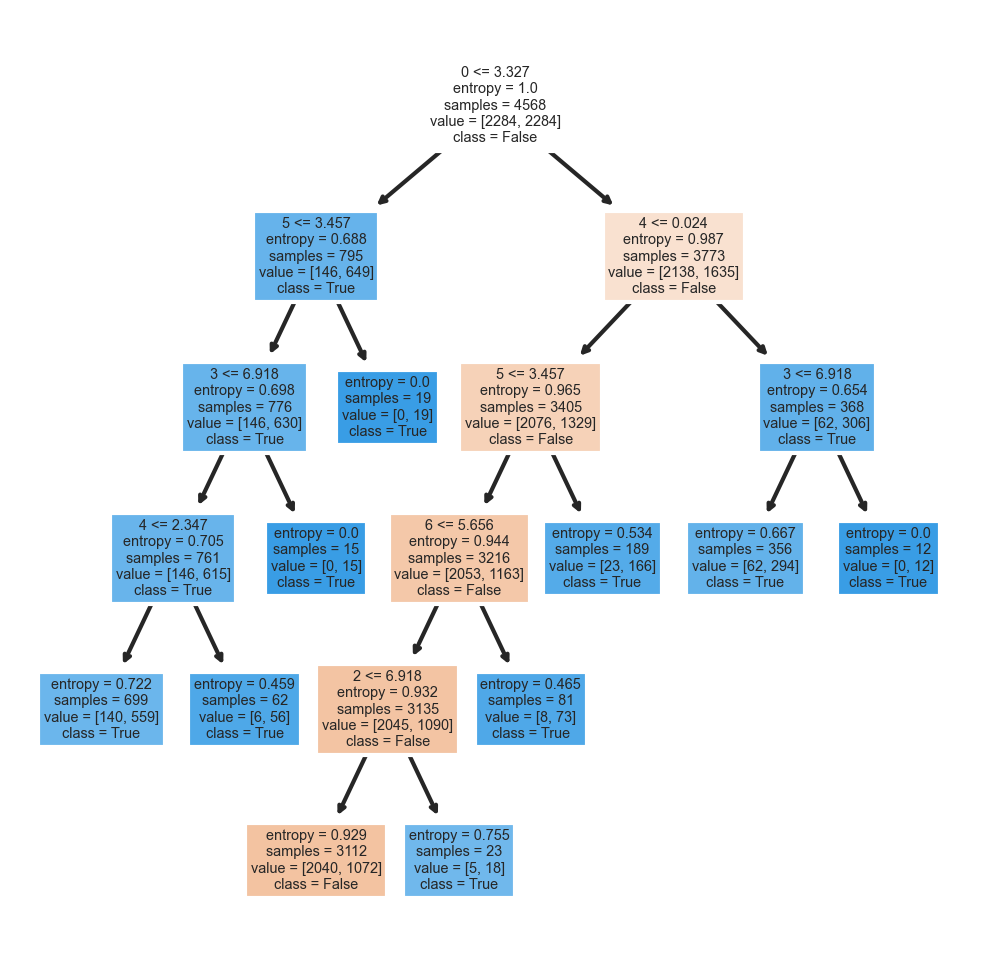

In [72]:
## plotting the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X_train_resampled.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [73]:
#evaluating predictive perfomance of the decison tree model
y_pred_train_DT = clf.predict(X_train_resampled)
print(classification_report(y_train_resampled,y_pred_train_DT))

              precision    recall  f1-score   support

       False       0.66      0.89      0.76      2284
        True       0.83      0.53      0.65      2284

    accuracy                           0.71      4568
   macro avg       0.74      0.71      0.70      4568
weighted avg       0.74      0.71      0.70      4568



In [74]:
#evaluating predictive perfomance of the decison tree model
y_pred_test_DT = clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred_test_DT))

              precision    recall  f1-score   support

       False       0.90      0.89      0.90       566
        True       0.43      0.47      0.45       101

    accuracy                           0.82       667
   macro avg       0.67      0.68      0.67       667
weighted avg       0.83      0.82      0.83       667



The two models, after all the data preprocessing done have the same issue of a low f1 score. It can be seen that the test data set is unbalanced, hence a possible cause for the low values.

#### 1) Applying post pruning to the decision tree model

Post pruning is being applied to reduce the overfitting nature of the model, and hence improve its generalization.

In [75]:
#choosing the best value of alpha for use with the ccp

path = clf.cost_complexity_pruning_path(X_train_resampled, y_train_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities 

#evaluating perfomance of decision tree models with each alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred_cl = clf.predict(X_train_resampled)
    f1_s = f1_score (y_train_resampled, y_pred_cl)
    clfs.append((ccp_alpha,f1_s))
    

alpha_1 = None
f1_s_1 = 0
for ccp_alpha, f1_s in clfs:
    if f1_s > f1_s_1:
        f1_chosen = f1_s
        alpha_chosen = ccp_alpha


alpha_chosen

0.032587941911026874

Though the alpha above is 0.033, it gives lower f1 score value hence the use of 0.01 below which gives higher f1 score value.

In [79]:
# Define the model with post-pruning
dtree_regpp = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)

# Train the model
dtree_regpp.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
#score = dtree_regpp.score(X_test, y_test)
#("Model Score after Pruning:", score)


DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [81]:
#evaluating predictive perfomance of the decision tree model - test
dtree_regpp_pred_test= dtree_regpp.predict(X_test_scaled)
print(classification_report(y_test,dtree_regpp_pred_test))


              precision    recall  f1-score   support

       False       0.90      0.89      0.90       566
        True       0.43      0.46      0.44       101

    accuracy                           0.82       667
   macro avg       0.66      0.67      0.67       667
weighted avg       0.83      0.82      0.83       667



### viii) Discussion

The project entails determining the whether a customer will soon stop doing business with SyriaTel telecommunication company. It therefore focuses on building a model that evaluates the variables/features that affect the churn rate of the customers,checking their correlation levels and predicting the posibility of a customer dropping off.
The steps carried out in this project are:

1)Data importation and checking for any missing values - there were no missing values

2)Splitting the data into train and test data with a test size of 20%

3)Building the first model - linear regression model. The model was trained on the train data set and afterward used for prediction

4)Buidling the second model - Decision tree model. It was fitted on the preprocessed data from the logistic regression model

5)Evaluation and improvement of the two models.

### ix) Findings

##### Logistic regression model

On fitting the logistic regression model the f1 score of the training model was 0.27 and the test data was at 0.2.This was clearly a very low figure contributed by the low valu of the recall metric(0.17 for the train,0.12 for the test).This points out to the fact that the model did not pick up most of the minority class(true) value,probably due to imbalaced data.

The data set was treated to the SMOTE technique which increased the f1 score of the training model to 0.53 and 0.47 on the test data.This was a better prediction basis but still quite low.The model seemed to be overfitting on the training data, hence the l2 regularization penalty applied.This did not have an impact on the f1-score value either. On further analysis, the f1 score final value with a precision of 0.43 and recall of 0.47 shows that the model predicts 43% of values correctly (customers who churn),while the recall value shows it only picks up 47% of the customers who actually churn.

##### Decision tree model

Using an alternate model to improve the perfomance of the f1 score did not provide better results.This necessitated the use of post pruning mechanism by the ccp allpha technique.
This also yielded the same result as the logistic regression resampled dataset.

##### Conclusion

The possible cause of the low f1 score is the data imbalance on the test data as it was treated as unseen/new data with no preprocessing done. The accuracy level was fairly good at 82% on the test model, meaning it correctly identified 82 people out of 100,whether they would drop off or not.

### x) Recommendation

-The logistic regression model is recommended for this case for its advantages such as being less prone to overfitting.

-Further tuning be done to improve the perfomance of the model especially with regards to the f1-score.

-More focus can be put into modifying or upgrading some customer features that have high correlation with the churn rate, such as customer service calls,total day charge,total day minutes

-More classification models can be used to further predict the data set with an aim of attaining the most efficient model.